<a href="https://colab.research.google.com/github/ylkim1947/Project8---Car-brand-classification/blob/main/Image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image preprocessing 
 When taking picture under the dim light environment, an object of the picture seems not clear. Although human vision can discriminate the object in the picture well , the AI (machine learning or deep learning) often fails to detect the objects. 

#### **That's why**

 1)  

 2) 



### **The purpose of this script :** To preprocess the images for the deep learning models


 #### 1) 




 #### 2) 




#### [주요 라이브러리]

: PyTorch,     torchvision, skimage
    

#### [Reference]

https://debuggercafe.com/adding-noise-to-image-data-for-deep-learning-data-augmentation/

https://wikidocs.net/156985  : PyTorch 딥러닝 챗봇, 5-1 Transform



# 0. Data 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from glob import glob
dataset_path ='/content/drive/MyDrive/Colab Notebooks/project4/yolov5/Socar_Hackerthon-2'
testset_path = dataset_path +'/test/images'
test_list = glob(testset_path +'/*.jpg')

trainset_path = dataset_path +'/train/images'
train_list = glob(trainset_path +'/*.jpg')

print(len(train_list))
print(len(test_list))

2989
136


# 1. Making Gaussian noise data

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image
from skimage.util import random_noise

import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image

In [ ]:
class TorchvisionMaskDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
       # self.imgs = list(sorted(os.listdir(self.path)))
        self.imgs = glob(self.path)
        self.transform = transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        image = Image.open(img_path)
        if self.transform:
            img = self.transform(image)

        return img

torchvision_transform = transforms.Compose([
    #transforms.Resize((300, 300)), 
    #transforms.RandomCrop(224),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
])

torchvision_testset = TorchvisionMaskDataset(
    path =testset_path +'/*.jpg',
    transform = torchvision_transform
)



torchvision_trainset = TorchvisionMaskDataset(
    path =trainset_path +'/*.jpg',
    transform = torchvision_transform
)

In [ ]:
print(len(torchvision_testset)) # Data 갯수
print(len(torchvision_trainset)) # Data 갯수

136
2989


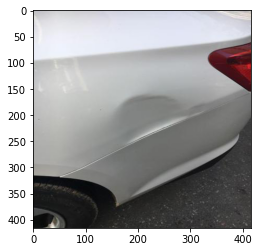

In [ ]:
# Original 이미지 
img_o = image.imread(test_list[2])
plt.imshow(img_o)

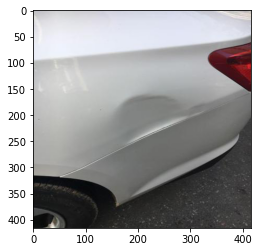

In [ ]:
## Torchvison transform 한 이미지

tf = transforms.ToPILImage()
img_t = tf(torchvision_testset[2])
plt.imshow(img_t)

In [ ]:
BATCH_SIZE = 1

testloader = torch.utils.data.DataLoader(
    torchvision_testset, 
    batch_size=BATCH_SIZE,
    shuffle=False
)

trainloader = torch.utils.data.DataLoader(
    torchvision_trainset, 
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
print(len(testloader)) # Data 갯수
print(len(trainloader)) # Data 갯수

136
2989


In [ ]:
name_d = test_list[0]

In [ ]:
name_d = name_d.replace('images','images_test')

In [ ]:
name_d

'/content/drive/MyDrive/Colab Notebooks/project4/yolov5/Socar_Hackerthon-2/test/images_test/20190219_5761_20143443_41c90a97bf3a4a2571225b99cffdf71c.rf.b0d5e2f06b07a50b2a888ac22d1e5ef4.jpg'

In [ ]:
## Adding Noise step

def makedirs(path): 
    ''' 
    경로에 폴더가 없으면, 폴더 만듬 + 상위 폴더도 같이 만들어줌
    '''
    try:
      if os.path.exists(path) == False:
          os.makedirs(path)
      else: 
        print('directory already exists ')
    except OSError:
        print("Error: Failed to create the directory.")


def save_noisy_image(img, name):
    ''' 
    과정: 이미지 사이즈 변경 or 유지 --> 저장
    실행: Color value 3개 or 1개 확인

    '''  
    if img.size(0) == 3:
        img = img.view( 3, 416, 416)  # RGB 
        save_image(img, name)
    else:
        img = img.view(1, 416, 416)  # either greyscale(?) or the one of RGB
        save_image(img, name)


def Adding_noise(Noise='gaussian',Loader=testloader,Datapath = 'test', Name_list =test_list ):
  '''
  과정: noise 생성 --> 사이즈 변경 or 유지 --> 폴더 and file 이름 변경 --> 저장
  실행: 파일이 있으면 pass 
  noise 변수: 'gaussian' , 's&p','speckle' ,‘localvar’,‘poisson’ ,‘salt’ ,'pepper 
  필요라이브러리: torch, random_noise, os 
  필요함수: save_noisy_image,makedirs
  '''
  
  noise_name = Noise
  noise_data_path = f"{dataset_path}/{Datapath}/images_{noise_name}/"
  makedirs(noise_data_path) 
  for num, data in enumerate(Loader):
        file_name =  Name_list[num].replace('images',f'images_{noise_name}')
        if os.path.isfile(file_name) == False:
            print(f"\r processing image number: {num}",end="") 
            img = data[0]
            img = torch.tensor(random_noise(img, mode=noise_name, mean=0, var=0.05, clip=False)) # random noise filtering 
            save_noisy_image(img,file_name)
        else:
          print(f"\r passing image number: {num}",end="") 
          continue

        #break

In [ ]:
Adding_noise('gaussian', testloader,'test')

 processing image number: 135

In [ ]:
Adding_noise('gaussian', trainloader,'train', train_list)

 processing image number: 2988

In [ ]:
print(img_t)

<PIL.Image.Image image mode=RGB size=416x416 at 0x7FDA9473B8D0>


In [ ]:
for num, data in enumerate(testloader):
    print(data.shape)
    print(data.dim())
    break


torch.Size([1, 3, 416, 416])
4


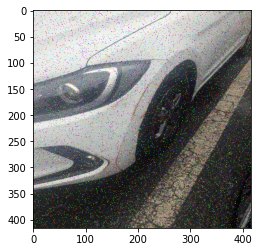

In [ ]:
#img = torch.tensor(random_noise(data, mode ='gaussian', mean=0, var=0.002, clip=False)) # random noise filtering 
img = torch.tensor(random_noise(data, mode ='s&p', amount=0.05, salt_vs_pepper=0.5, clip=False)) # random noise filtering 
img_n = tf(torch.squeeze(img))
plt.imshow(img_n)

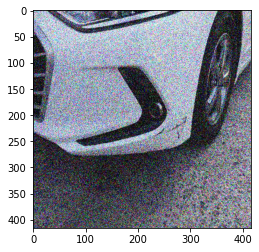

In [ ]:
img_list_gaus = glob( f"{dataset_path}/test/images_gaussian/" +'/*.jpg')
# Original 이미지 
img_g = image.imread(img_list_gaus[1])
plt.imshow(img_g)

# 2. Normalization data
https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/

* ~Load and visualize image and plot pixel values. 이미 했음~
* ~Transform image to Tensors using torchvision.transforms.ToTensor() 이미 했음~
* Calculate mean and standard deviation (std)
* Normalize the image using torchvision.transforms.Normalize().
* Visualize normalized image.
* Calculate mean and std after normalize and verify them.

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image

import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image

In [ ]:
# 예시 tensor --> mean과 std 추출
# calculate mean and std
mean, std = data[0].mean([1,2]), data[0].std([1,2])

# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)


mean and std before normalize:
Mean of the image: tensor([0.4631, 0.4624, 0.4553])
Std of the image: tensor([0.3082, 0.3068, 0.3086])


In [ ]:
## Normalization data

def makedirs(path): 
    ''' 
    경로에 폴더가 없으면, 폴더 만듬 + 상위 폴더도 같이 만들어줌
    '''
    try:
      if os.path.exists(path) == False:
          os.makedirs(path)
      else: 
        print('directory already exists ')
    except OSError:
        print("Error: Failed to create the directory.")


def save_noisy_image(img, name):
    ''' 
    과정: 이미지 사이즈 변경 or 유지 --> 저장
    실행: Color value 3개 or 1개 확인

    '''  
    if img.size(0) == 3:
        img = img.view( 3, 416, 416)  # RGB 
        save_image(img, name)
    else:
        img = img.view(1, 416, 416)  # either greyscale(?) or the one of RGB
        save_image(img, name)


def Image_normalization(Loader=testloader,Datapath = 'test', Name_list =test_list ):
  '''
  과정: xxxx --> xxx or 유지 --> 폴더 and file 이름 변경 --> 저장
  실행: 파일이 있으면 pass 
  xxxx: 
  필요라이브러리: torch, os 
  필요함수: save_noisy_image,makedirs
  '''
  
  noise_data_path = f"{dataset_path}/{Datapath}/images_normalization/"
  makedirs(noise_data_path) 
  for num, data in enumerate(Loader):
        file_name =  Name_list[num].replace('images',f'images_normalization')
        if os.path.isfile(file_name) == False:
            print(f"\r processing image number: {num}",end="") 
            img = data[0]
            mean, std = img.mean([1,2]), img.std([1,2])
            transform_norm = transforms.Compose([transforms.Normalize(mean, std)]) ## Normalization _ transform
            
            img_normalized = transform_norm(img) # get normalized image

            save_noisy_image(img_normalized,file_name)
        else:
          print(f"\r passing image number: {num}",end="") 
          continue

        #break

In [ ]:
Image_normalization(Loader=testloader,Datapath = 'test', Name_list =test_list )

 processing image number: 135

In [ ]:
Image_normalization(Loader=trainloader,Datapath = 'train', Name_list =train_list )

 processing image number: 2988

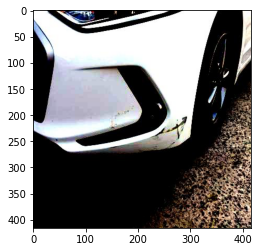

In [ ]:
img_list_gaus = glob( f"{dataset_path}/test/images_normalization/" +'/*.jpg')
# Original 이미지 
img_g = image.imread(img_list_gaus[1])
plt.imshow(img_g)

# 3. Greyscale 


In [ ]:
## Normalization data

def makedirs(path): 
    ''' 
    경로에 폴더가 없으면, 폴더 만듬 + 상위 폴더도 같이 만들어줌
    '''
    try:
      if os.path.exists(path) == False:
          os.makedirs(path)
      else: 
        print('directory already exists ')
    except OSError:
        print("Error: Failed to create the directory.")


def save_noisy_image(img, name):
    ''' 
    과정: 이미지 사이즈 변경 or 유지 --> 저장
    실행: Color value 3개 or 1개 확인

    '''  
    if img.size(0) == 3:
        img = img.view( 3, 416, 416)  # RGB 
        save_image(img, name)
    else:
        img = img.view(1, 416, 416)  # either greyscale(?) or the one of RGB
        save_image(img, name)


def Image_grayscale(Loader=testloader,Datapath = 'test', Name_list =test_list ):
  '''
  과정: xxxx --> xxx or 유지 --> 폴더 and file 이름 변경 --> 저장
  실행: 파일이 있으면 pass 
  xxxx: 
  필요라이브러리: torch, os 
  필요함수: save_noisy_image,makedirs
  '''
  
  noise_data_path = f"{dataset_path}/{Datapath}/images_gray/"
  makedirs(noise_data_path) 
  for num, data in enumerate(Loader):
        file_name =  Name_list[num].replace('images',f'images_gray')
        if os.path.isfile(file_name) == False:
            print(f"\r processing image number: {num}",end="") 
            img = data[0]
            transform_norm = transforms.Compose([transforms.Grayscale(num_output_channels=3)]) ## gray_ transform
            
            img_normalized = transform_norm(img) # get normalized image

            save_noisy_image(img_normalized,file_name)
        else:
          print(f"\r passing image number: {num}",end="") 
          continue

        #break

In [ ]:
Image_grayscale(Loader=testloader,Datapath = 'test', Name_list =test_list )

 processing image number: 135

In [ ]:
Image_grayscale(Loader=trainloader,Datapath = 'train', Name_list =train_list )

 processing image number: 2988

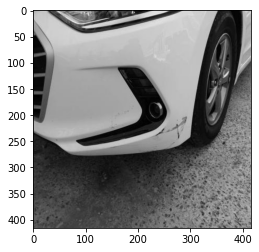

In [ ]:
img_list_gaus = glob( f"{dataset_path}/test/images_gray/" +'/*.jpg')
# Original 이미지 
img_g = image.imread(img_list_gaus[1])
plt.imshow(img_g)